# Self-Organizing Maps (SOMs)
<hr>

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr>

## Importing the dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

<hr>

## Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [4]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

<hr>

## Visualizing the results

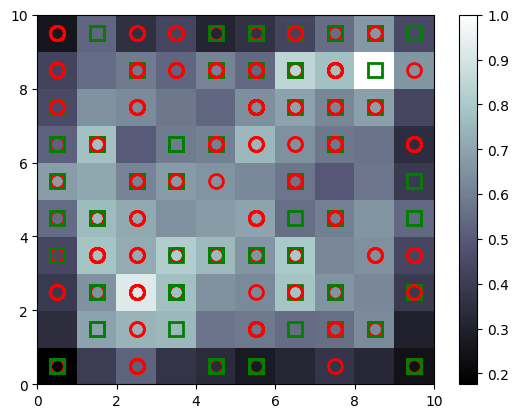

In [5]:
from pylab import bone, pcolor, colorbar, plot, show

# Creating a blank window
bone()

# Creating a Map
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = "None", markersize = 10, markeredgewidth = 2)

show()

<hr>

## Finding the frauds

In [6]:
mappings = som.win_map(X)

frauds = np.concatenate((mappings[(8, 1)], mappings[(6, 8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [7]:
frauds

array([[1.5660390e+07, 0.0000000e+00, 5.8670000e+01, 4.4600000e+00,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 3.0400000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 4.3000000e+01, 5.6100000e+02],
       [1.5790254e+07, 0.0000000e+00, 1.8920000e+01, 9.0000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 7.5000000e-01,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 8.8000000e+01, 5.9200000e+02],
       [1.5768600e+07, 0.0000000e+00, 2.2420000e+01, 5.6650000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5850000e+00,
        1.0000000e+00, 1.0000000e+00, 7.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.2900000e+02, 3.2580000e+03],
       [1.5748552e+07, 0.0000000e+00, 3.0670000e+01, 1.2000000e+01,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

<hr>